In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import pickle

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [3]:
#load the dataset
dataset = pd.read_csv('c_w_r.csv')

In [4]:
print(dataset.dtypes)

CROP_TYPE             object
SOIL_TYPE             object
REGION                object
TEMPERATURE           object
WEATHER_CONDITION     object
WATER_REQUIREMENT    float64
dtype: object


In [5]:
#handling missing data
#print(dataset.isnull().sum())

'''# converting 'Weight' from float to int
dataset['WATER_REQUIREMENT'] = dataset['WATER_REQUIREMENT'].astype(int)
#print(dataset.dtypes)'''

print(dataset.dtypes)


CROP_TYPE             object
SOIL_TYPE             object
REGION                object
TEMPERATURE           object
WEATHER_CONDITION     object
WATER_REQUIREMENT    float64
dtype: object


In [6]:
#label encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['CROP_TYPE'] = LE.fit_transform(dataset.CROP_TYPE)
st = LE.classes_
print(sorted(st))
dataset['SOIL_TYPE'] = LE.fit_transform(dataset.SOIL_TYPE)
st = LE.classes_
print(sorted(st))
dataset['REGION'] = LE.fit_transform(dataset.REGION)
st = LE.classes_
print(sorted(st))
dataset['TEMPERATURE'] = LE.fit_transform(dataset.TEMPERATURE)
st = LE.classes_
print(sorted(st))
dataset['WEATHER_CONDITION'] = LE.fit_transform(dataset.WEATHER_CONDITION)
st = LE.classes_
print(sorted(st))

['BANANA', 'BEAN', 'CABBAGE', 'CITRUS', 'COTTON', 'MAIZE', 'MELON', 'MUSTARD', 'ONION', 'POTATO', 'RICE', 'SOYABEAN', 'SUGARCANE', 'TOMATO', 'WHEAT']
['DRY', 'HUMID', 'WET']
['DESERT', 'HUMID', 'SEMI ARID', 'SEMI HUMID']
['20-30', '30-40', '40-50', 'Oct-20']
['NORMAL', 'RAINY', 'SUNNY', 'WINDY']


In [7]:
#seperate into independent and dependent variables
#print(dataset.columns)
x = dataset.iloc[:,:-1]
y = dataset.loc[:,'WATER_REQUIREMENT']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)


In [8]:
#importing random forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()


In [9]:
#model training
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [10]:
#accuracy
print("model score:",model.score(x_test,y_test)*100)

model score: 64.90208171682112


In [11]:
#RMS Score method for accuracy
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
print("R2 score : ",r1*100)

R2 score :  64.90208171682112


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
model = GradientBoostingRegressor()

# Model training
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Model evaluation
print("Model score:", model.score(x_test, y_test) * 100)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2 * 100)


Model score: 11.393666816062176
R2 score: 11.393666816062176


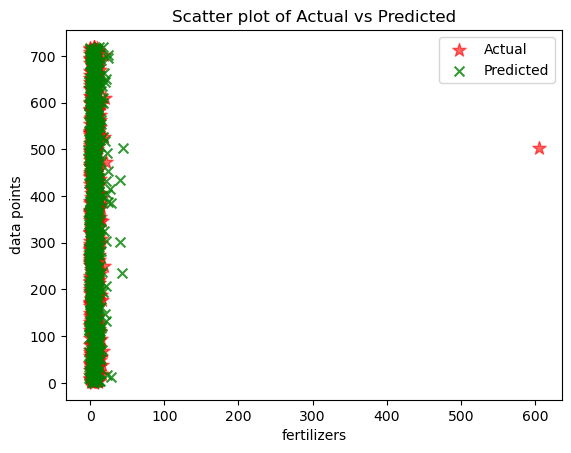

In [13]:
import matplotlib.pyplot as plt
plt.scatter(y_test,range(0,len(y_test)), color = 'red', marker="*", s=100, alpha=0.6, label="Actual" )
plt.scatter(y_pred,range(0,len(y_pred)), color = 'green', marker="x", s=50, alpha=0.8, label="Predicted")
plt.title("Scatter plot of Actual vs Predicted")
plt.xlabel("fertilizers")
plt.ylabel("data points")
plt.legend(loc="upper right")
plt.show()

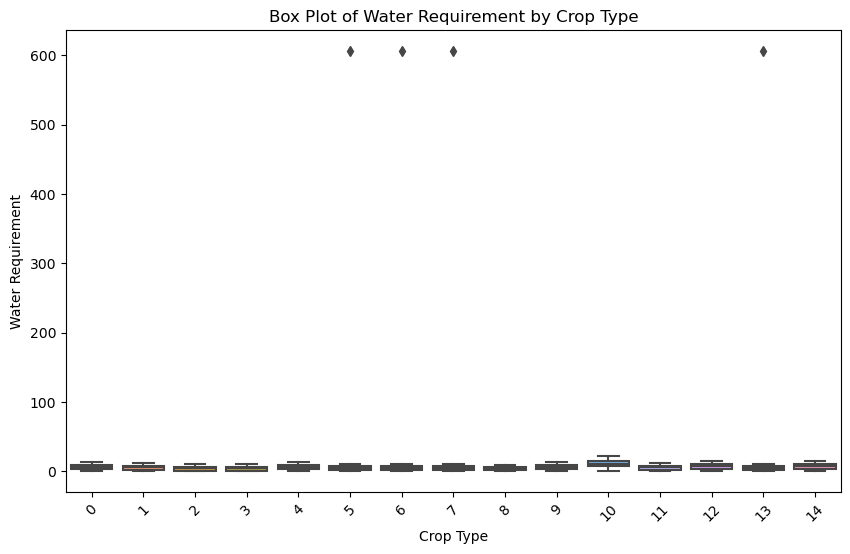

In [14]:
import seaborn as sns

# Box plot of Water Requirement by Crop Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='CROP_TYPE', y='WATER_REQUIREMENT', data=dataset)
plt.title('Box Plot of Water Requirement by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Water Requirement')
plt.xticks(rotation=45)
plt.show()


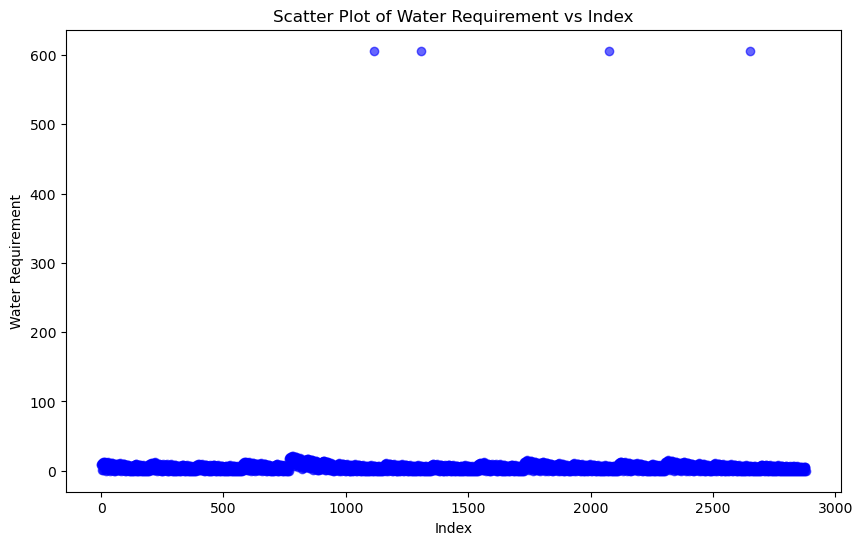

In [15]:
# Scatter plot of Water Requirement vs Index
plt.figure(figsize=(10, 6))
plt.scatter(range(len(dataset['WATER_REQUIREMENT'])), dataset['WATER_REQUIREMENT'], color='blue', alpha=0.6)
plt.title('Scatter Plot of Water Requirement vs Index')
plt.xlabel('Index')
plt.ylabel('Water Requirement')
plt.show()


In [16]:
l=[0,0,0,0,0]
arr=np.array(l)
arr=arr.reshape(1,-1)
print(model.predict(arr))


[8.5290312]


In [17]:
pickle.dump(model, open('c_w_r.pkl', 'wb'))
c_w_r = pickle.load(open('c_w_r.pkl', 'rb'))

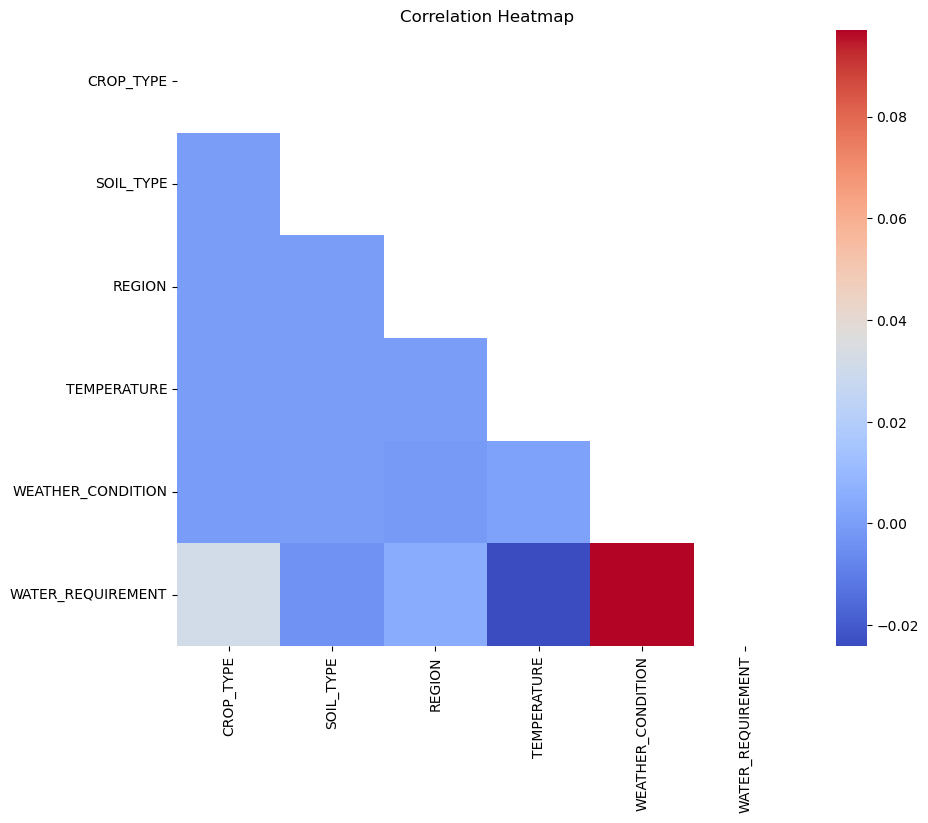

In [18]:
import seaborn as sns

# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()


In [19]:
import pandas as pd

# Define the input data
input_data = {
    'CROP_TYPE': ['BANANA'],
    'SOIL_TYPE': ['DRY'],
    'REGION': ['DESERT'],
    'TEMPERATURE': ['20-30'],
    'WEATHER_CONDITION': ['NORMAL']
}

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)

# Preprocess the input data manually to handle non-numeric values
# Convert categorical variables to numerical format
input_df['CROP_TYPE'] = input_df['CROP_TYPE'].map({'BANANA': 0})
input_df['SOIL_TYPE'] = input_df['SOIL_TYPE'].map({'DRY': 0})
input_df['REGION'] = input_df['REGION'].map({'DESERT': 0})
input_df['WEATHER_CONDITION'] = input_df['WEATHER_CONDITION'].map({'NORMAL': 0})

# Now, we need to handle the TEMPERATURE column
# For simplicity, let's just take the average temperature for now
input_df['TEMPERATURE'] = input_df['TEMPERATURE'].apply(lambda x: sum(map(int, x.split('-'))) / 2)

# Check if the number of features matches the model's expectations
if input_df.shape[1] != 5:
    raise ValueError(f"Input data has {input_df.shape[1]} features, but the model expects 5 features.")

# Now, we can use the preprocessor and model to make predictions
input_preprocessed = input_df.values.reshape(1, -1)  # Reshape input data to match the model's expectations
predictions = model.predict(input_preprocessed)

# Print the predicted water requirement
print("Predicted Water Requirement for the crop is:", predictions[0], "liters")


Predicted Water Requirement for the crop is: 7.343908570263861 liters


In [20]:
import pandas as pd

# Define the input data
input_data = {
    'CROP_TYPE': ['SOYABEAN'],
    'SOIL_TYPE': ['HUMID'],
    'REGION': ['SEMI ARID'],
    'TEMPERATURE': ['20'],
    'WEATHER_CONDITION': ['NORMAL'],
}

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)

# Preprocess the input data manually to handle non-numeric values
# Convert categorical variables to numerical format
input_df['CROP_TYPE'] = input_df['CROP_TYPE'].map({'SOYABEAN': 1})
input_df['SOIL_TYPE'] = input_df['SOIL_TYPE'].map({'HUMID': 1})
input_df['REGION'] = input_df['REGION'].map({'SEMI ARID': 1})
input_df['WEATHER_CONDITION'] = input_df['WEATHER_CONDITION'].map({'NORMAL': 1})

# Now, we need to handle the TEMPERATURE column
# For simplicity, let's just take the average temperature for now
input_df['TEMPERATURE'] = input_df['TEMPERATURE'].apply(lambda x: sum(map(int, x.split('-'))) / 2)

# Check if the number of features matches the model's expectations
if input_df.shape[1] != 5:
    raise ValueError(f"Input data has {input_df.shape[1]} features, but the model expects 5 features.")

# Now, we can use the preprocessor and model to make predictions
input_preprocessed = input_df.values.reshape(1, -1)  # Reshape input data to match the model's expectations
predictions = model.predict(input_preprocessed)

# Print the predicted water requirement with units
print("Predicted Water Requirement for the crop is:", predictions[0], "liters")


Predicted Water Requirement for the crop is: 0.47036757874604496 liters
